# 0

In [46]:
# matpltlib 库以及参数
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams.update({'axes.labelsize': 'large'})
matplotlib.rcParams.update({'xtick.labelsize': 'large'})
matplotlib.rcParams.update({'ytick.labelsize': 'large'})
matplotlib.rcParams.update({'legend.fontsize': 'large'})
matplotlib.rcParams.update({'errorbar.capsize': 3})

#其他的库
import numpy as np
import pandas as pd
import scipy as sp 
from scipy.optimize import leastsq

#封装进度条的函数
from tqdm import tqdm    

#导入自定义函数


# 1

In [16]:
df_mean      =pd.read_csv('./DATA/redshift_bin_mean.csv',index_col=0)
df_mean_err  =pd.read_csv('./DATA/redshift_bin_meanerr.csv',index_col=0)
df_median    =pd.read_csv('./DATA/redshift_bin_median.csv',index_col=0)
df_median_err=pd.read_csv('./DATA/redshift_bin_medianerr.csv',index_col=0)

In [20]:
df_mean

,REDSHIFT,g_SDSS,r_SDSS,i_SDSS,LOGBH,LOGEDD_RATIO,LOGLBOL,g_HSC,r_HSC,i_HSC,g_SDSS-HSC,r_SDSS-HSC,i_SDSS-HSC,MBH,EDD_RATIO,LBOL,half_g_SDSS+HSC
0,0.327368,19.215830,18.828650,18.697480,8.345053,-1.219896,45.225528,19.451508,19.075982,18.973644,-0.235678,-0.247332,-0.276164,4.575902e+08,0.117310,1.789129e+45,19.333669
1,0.414784,19.426530,19.229370,18.982300,8.304952,-1.096950,45.308372,19.645981,19.417677,19.284752,-0.219451,-0.188307,-0.302452,3.795558e+08,0.139648,2.184636e+45,19.536256
2,0.481596,19.550780,19.407600,19.107710,8.384839,-1.098593,45.386617,19.731341,19.576375,19.366878,-0.180561,-0.168775,-0.259168,4.363630e+08,0.148430,2.717153e+45,19.641060
3,0.537863,19.681230,19.584740,19.284710,8.443467,-1.108285,45.435552,19.881230,19.790427,19.565761,-0.200000,-0.205687,-0.281051,7.653036e+08,0.140593,3.155365e+45,19.781230
4,0.589805,19.774010,19.711990,19.428320,8.435298,-1.106473,45.429195,19.910715,19.845368,19.644070,-0.136705,-0.133378,-0.215750,5.425175e+08,0.166554,3.135207e+45,19.842362
5,0.637809,19.663440,19.584510,19.353210,8.481101,-1.055334,45.526137,19.791976,19.718794,19.532212,-0.128536,-0.134284,-0.179002,5.657060e+08,0.148370,3.873874e+45,19.727708
6,0.692629,19.655420,19.555900,19.442530,8.436703,-1.009688,45.527386,19.877518,19.771190,19.610588,-0.222098,-0.215290,-0.168058,4.726589e+08,0.162181,3.984096e+45,19.766469
7,0.741744,19.621580,19.503620,19.462730,8.564630,-1.082607,45.582394,19.754299,19.653648,19.585542,-0.132719,-0.150028,-0.122812,5.590454e+08,0.136514,5.022812e+45,19.687939
8,0.798674,19.501840,19.376370,19.395940,8.629124,-1.041742,45.687753,19.655374,19.535964,19.570681,-0.153534,-0.159594,-0.174741,6.235559e+08,0.132038,5.949359e+45,19.578607
9,0.854031,19.553600,19.404760,19.416580,8.629482,-0.987525,45.742327,19.709241,19.592812,19.634969,-0.155641,-0.188052,-0.218389,5.939250e+08,0.157958,6.937611e+45,19.631420


# 2.1.three band  magnitude res redshift(3p)

In [17]:
def My_Temp_Plot_Redshift(band):
    
    x= df_mean['REDSHIFT']
    y= df_mean['%s_SDSS-HSC'% band]
    err=df_mean_err['%s_SDSS-HSC_err'% band]
    
    #以kx+b来进行最小二乘拟合
    def residual(para):
        k,b=para
        return y-(k*x+b)#额外定义函数能让谁是参量显得更直观
    result=sp.optimize.leastsq(residual,[0,0])
    k,b=result[0]
    #存进kg，kb以便画合在一起的图
    k_list.append(k);b_list.append(b)
    print('k=',k,'\n','b=',b)
    
###############################################################################    
        #图片基础设定
    matplotlib.rcParams.update({'font.size': 18})

    fig=plt.figure(figsize=(18,6))
    plt.ylim([-0.3, 0.2])
    plt.xlim(0,4)
    
    plt.title('%s-band'% band)
    plt.xlabel('redshift')
    plt.ylabel('%s_SDSS-HSC(psf)'% band)
    
    #画errorbar图
    plt.errorbar(x,\
                 y,\
                 err,\
                 marker='o',capsize=2,ls='',color='blue',label='AGN data, %s-band'%band);
    #########################################################################
    #辅助直线
    x=np.linspace(0,4,50)
    y=0*x
    plt.plot(x,y,color='black',linestyle='dashed',linewidth=2);
    ########################################################################
    #拟合直线
    x=np.linspace(0,4)
    y=k*x+b
    plt.plot(x,y,color="#00009C",label="%s_band Fitting Line"%band,linewidth=2,ls="--"); #画拟合直线
    #显示标签
    plt.legend();

k= 0.054719843300008085 
 b= -0.18636016386276996
k= 0.04129085145710759 
 b= -0.16356478185475076
k= 0.06484204196576139 
 b= -0.22672177389168904


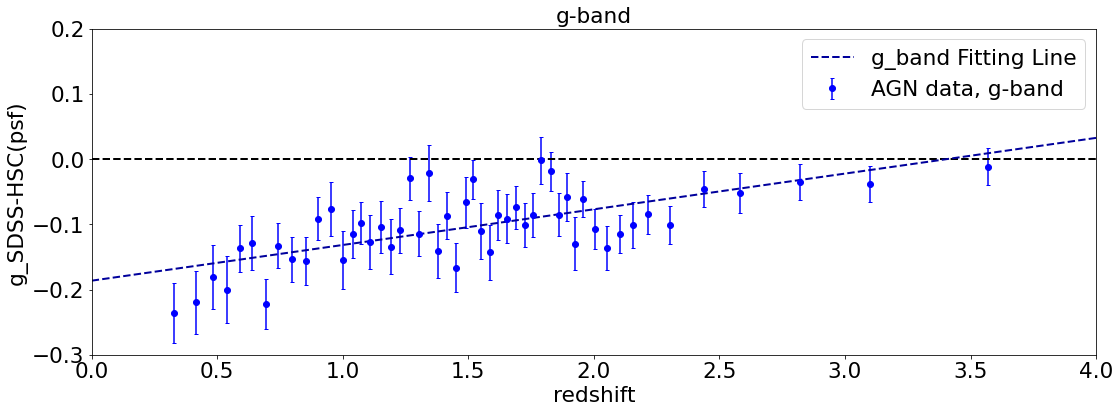

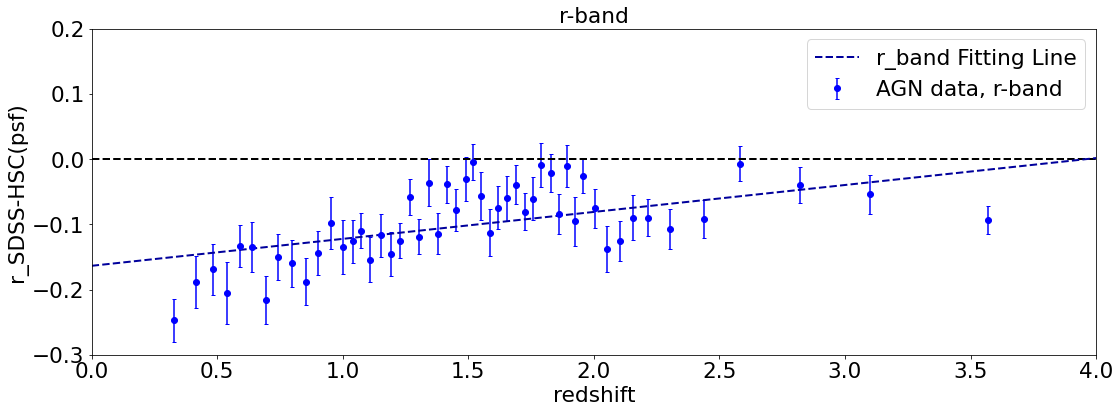

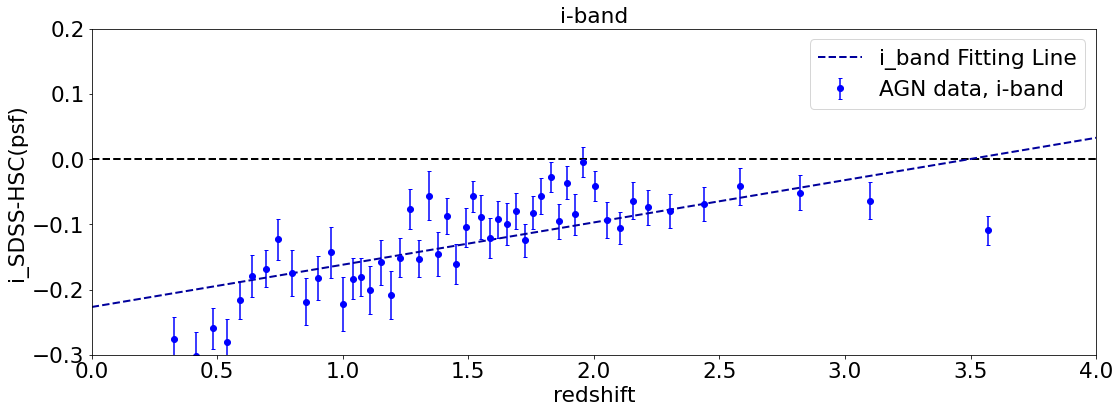

In [18]:
band_list=['g','r','i']
k_list=[];b_list=[]
for i in band_list:
    My_Temp_Plot_Redshift(i)
    plt.savefig('./FIGURES/1_1_fig1_mean_%s.pdf'%i)

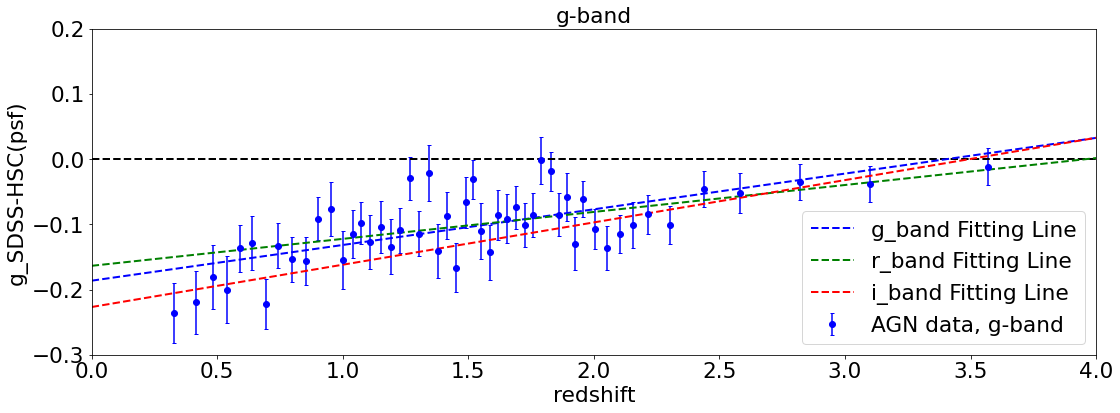

In [49]:
band='g'
COLORLIST=['blue','cyan','green','orange','red']

x= df_mean['REDSHIFT']
y= df_mean['%s_SDSS-HSC'% band]
err=df_mean_err['%s_SDSS-HSC_err'% band]

###############################################################################    
    #图片基础设定
matplotlib.rcParams.update({'font.size': 18})

fig=plt.figure(figsize=(18,6))
plt.ylim([-0.3, 0.2])
plt.xlim(0,4)

plt.title('%s-band'% band)
plt.xlabel('redshift')
plt.ylabel('%s_SDSS-HSC(psf)'% band)

#画errorbar图
plt.errorbar(x,\
             y,\
             err,\
             marker='o',capsize=2,ls='',color='blue',label='AGN data, g-band');
#########################################################################
#辅助直线
x=np.linspace(0,4,50)
y=0*x
plt.plot(x,y,color='black',linestyle='dashed',linewidth=2);
########################################################################
    #拟合直线
for i in range(3):
    x=np.linspace(0,4)
    y=k_list[i]*x+b_list[i]
    plt.plot(x,y,color=COLORLIST[2*i],label="%s_band Fitting Line"%band_list[i],linewidth=2,ls="--"); #画拟合直线
    #显示标签
    plt.legend();
plt.savefig('./FIGURES/1_1_fig1_mean_all.pdf')

# 2.2. other para res redshift(4p)

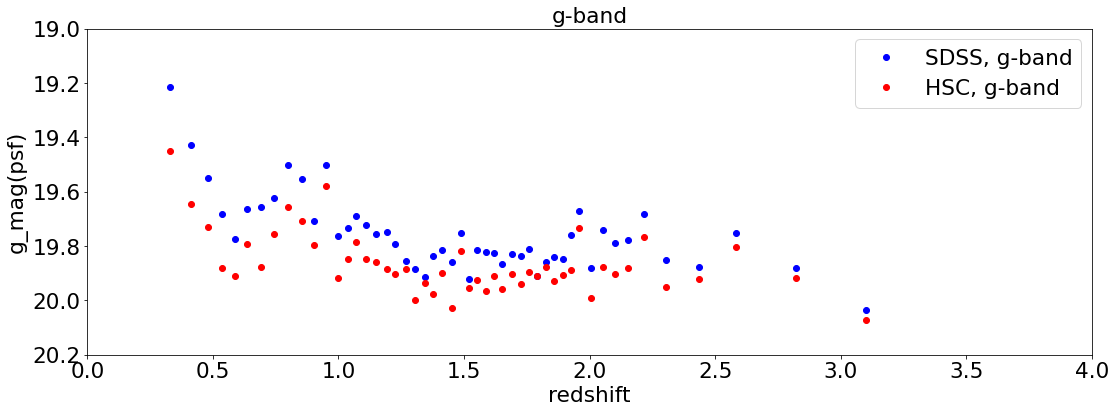

In [47]:
band='g'
x= df_mean['REDSHIFT']
y= df_mean['%s_SDSS'% band]
yp=df_mean['%s_HSC'% band]

###############################################################################    
    #图片基础设定
matplotlib.rcParams.update({'font.size': 18})

fig=plt.figure(figsize=(18,6))
plt.ylim(20.2,19)
plt.xlim(0,4)

plt.title('%s-band'% band)
plt.xlabel('redshift')
plt.ylabel('%s_mag(psf)'% band)

#画errorbar图
plt.errorbar(x,\
             y,\
             marker='o',capsize=2,ls='',color='blue',label='SDSS, %s-band'%band);
plt.errorbar(x,\
             yp,\
             marker='o',capsize=2,ls='',color='red',label='HSC, %s-band'%band);
plt.legend()


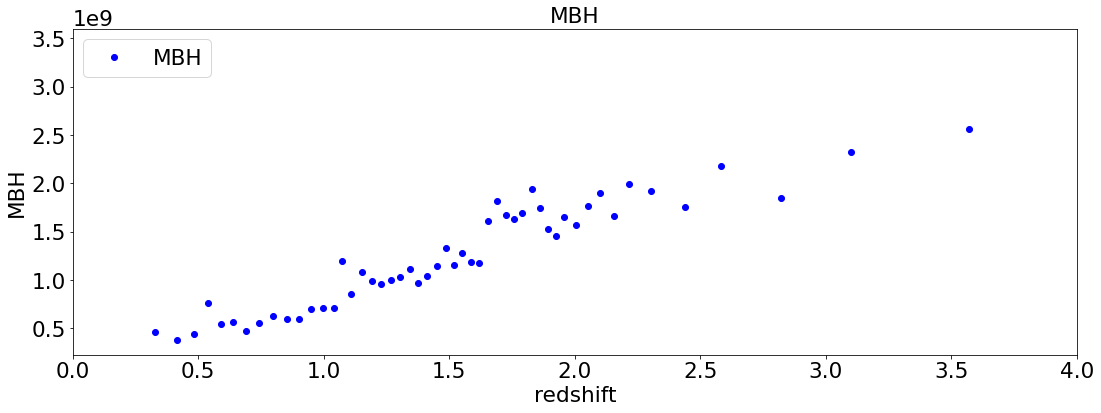

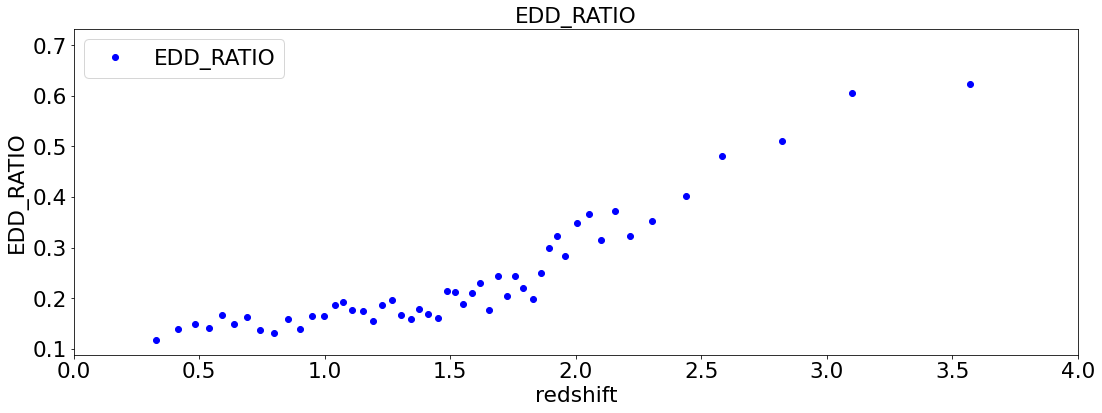

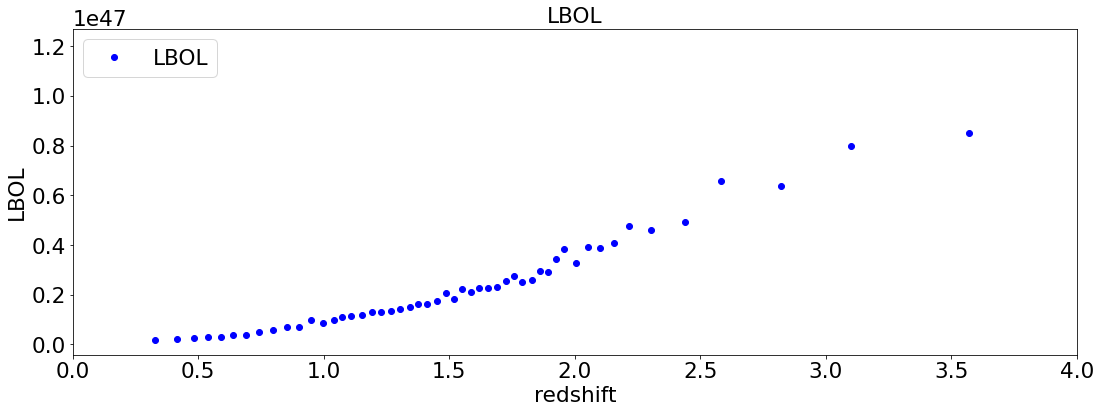

In [48]:
taglist=['MBH','EDD_RATIO','LBOL']
for tag in taglist:
    x= df_mean['REDSHIFT']
    y= df_mean[tag]
    ###############################################################################    
        #图片基础设定
    matplotlib.rcParams.update({'font.size': 18})

    fig=plt.figure(figsize=(18,6))
    plt.ylim()
    plt.xlim(0,4)

    plt.title(tag)
    plt.xlabel('redshift')
    plt.ylabel(tag)

    #画errorbar图
    plt.errorbar(x,\
                 y,\
                 marker='o',capsize=2,ls='',color='blue',label=tag);

    plt.legend()


# 第三张图 3，4是median

In [6]:
def My_Temp_Plot_Redshift_median(band):
    
    x= df_median['REDSHIFT']
    y= df_median['%s_SDSS-HSC'% band]
    err=df_median_err['%s_SDSS-HSC_err'% band]
    
    #以kx+b来进行最小二乘拟合
    def residual(para):
        k,b=para
        return y-(k*x+b)#额外定义函数能让谁是参量显得更直观
    result=sp.optimize.leastsq(residual,[0,0])
    k,b=result[0]
    #存进kg，kb以便画合在一起的图
    k_list.append(k);b_list.append(b)
    print('k=',k,'\n','b=',b)
    
###############################################################################    
        #图片基础设定
    matplotlib.rcParams.update({'font.size': 18})

    fig=plt.figure(figsize=(18,6))
    plt.ylim([-0.3, 0.2])
    plt.xlim(0,4)
    
    plt.title('%s-band'% band)
    plt.xlabel('redshift')
    plt.ylabel('%s_SDSS-HSC(psf)'% band)
    
    #画errorbar图
    plt.errorbar(x,\
                 y,\
                 err,\
                 marker='o',capsize=2,ls='',color='blue',label='AGN data, %s-band'%band);
    #########################################################################
    #辅助直线
    x=np.linspace(0,4,50)
    y=0*x
    plt.plot(x,y,color='black',linestyle='dashed',linewidth=2);
    ########################################################################
    #拟合直线
    x=np.linspace(0,4)
    y=k*x+b
    plt.plot(x,y,color="#00009C",label="%s_band Fitting Line"%band,linewidth=2,ls="--"); #画拟合直线
    #显示标签
    plt.legend();

k= 0.04365256900976826 
 b= -0.14421061451797007
k= 0.036714300379525694 
 b= -0.13522930394477808
k= 0.05332063797336686 
 b= -0.19064179538086748


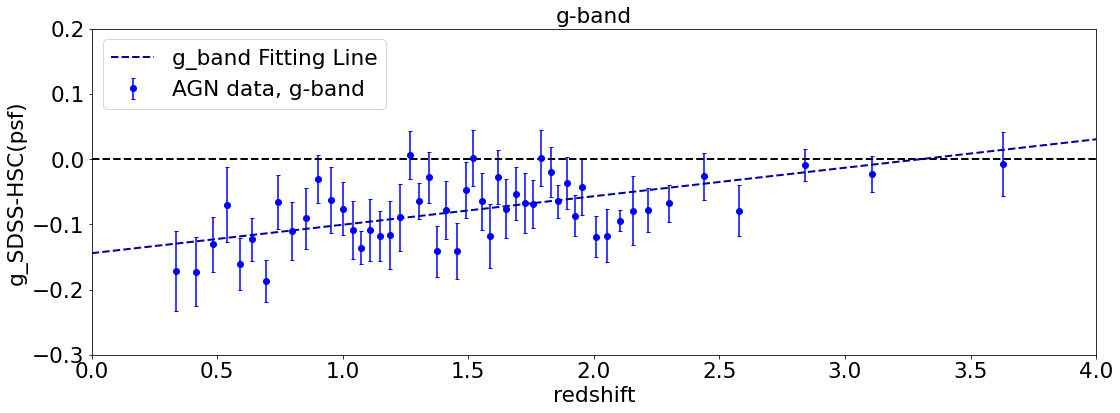

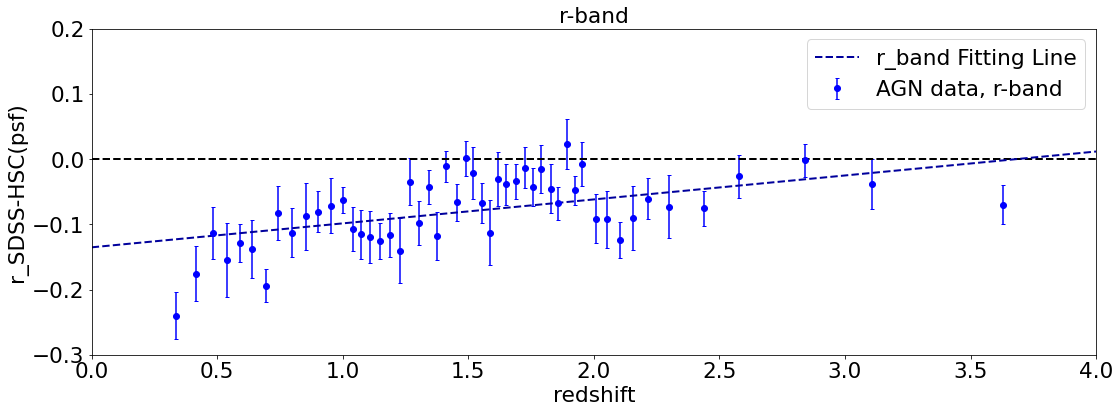

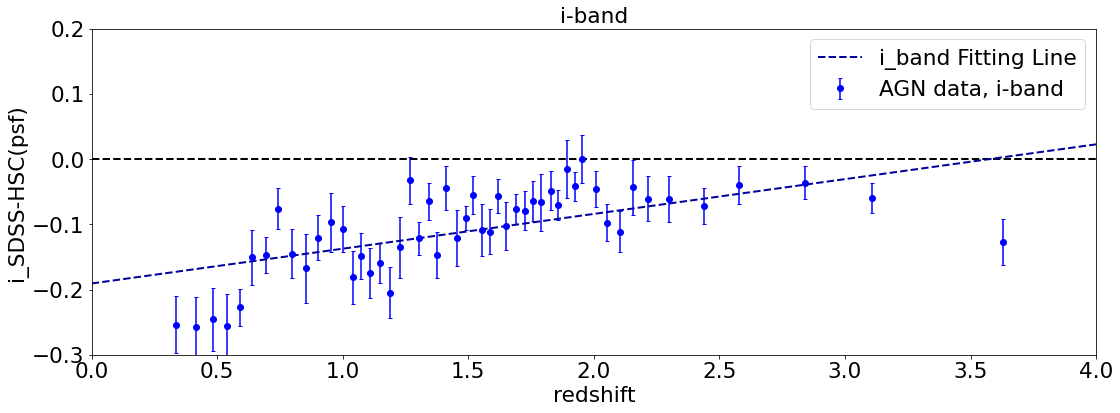

In [7]:
band_list=['g','r','i']
k_list=[];b_list=[]
for i in band_list:
    My_Temp_Plot_Redshift_median(i)
    plt.savefig('./FIGURES/1_1_fig2_median_%s.pdf'%i)

# 第四张图

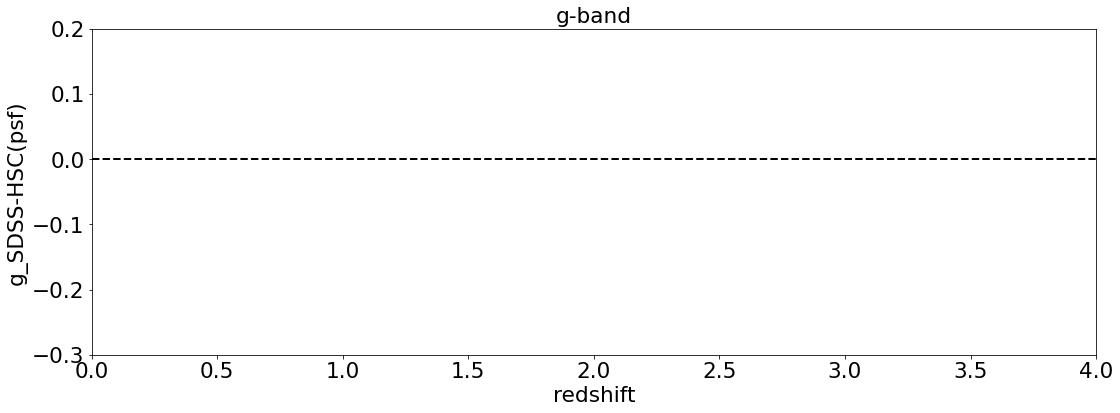

In [8]:
band='g'
COLORLIST=['blue','cyan','green','orange','red']

x= df_mean['REDSHIFT']
y= df_mean['%s_SDSS-HSC'% band]
err=df_mean_err['%s_SDSS-HSC_err'% band]

###############################################################################    
    #图片基础设定
matplotlib.rcParams.update({'font.size': 18})

fig=plt.figure(figsize=(18,6))
plt.ylim([-0.3, 0.2])
plt.xlim(0,4)

plt.title('%s-band'% band)
plt.xlabel('redshift')
plt.ylabel('%s_SDSS-HSC(psf)'% band)

#画errorbar图
plt.errorbar(x,\
             y,\
             err,\
             marker='o',capsize=2,ls='',color='blue',label='AGN data, g-band');
#########################################################################
#辅助直线
x=np.linspace(0,4,50)
y=0*x
plt.plot(x,y,color='black',linestyle='dashed',linewidth=2);
########################################################################
    #拟合直线
for i in range(3):
    x=np.linspace(0,4)
    y=k_list[i]*x+b_list[i]
    plt.plot(x,y,color=COLORLIST[2*i],label="%s_band Fitting Line"%band_list[i],linewidth=2,ls="--"); #画拟合直线
    #显示标签
    plt.legend();
plt.savefig('./FIGURES/1_1_fig2_median_all.pdf')